In [1]:
from numpy import *
from matplotlib.pyplot import *
import matplotlib.pylab as pylab
import matplotlib.lines as mlines
%matplotlib inline
pylab.rcParams['figure.figsize']= 16,5
import pandas as pd
import gc

In [2]:
def get_TS():
    rawData = pd.read_csv('Resources/Consulta_Banxico.csv', sep=',', encoding='latin1', skiprows=15, skip_blank_lines=True)
    Data = rawData.drop(rawData.index[:2])
    Data = Data.reset_index(drop = True)
    Data.columns = ['Fecha' , 'Tasa de crecimiento Mensual']
    TS = pd.Series(Data['Tasa de crecimiento Mensual'].astype(float))
    TS.index= Data['Fecha']
    del Data
    return TS

In [3]:
def plot_ValSolutions(PredictsList,Mean,TS,MeanRMSE,RMse,upperBound,lowerBound,time):
    """
    Function to Plot List of predictions, mean predictions and Original Time Serie
    :param PredictsList: List of predictions make
    :param Mean: Mean prediction
    :param TS: Original Time Serie
    :return: matplotlib fig
    """
    fig = figure()
    TSValPredictions = TS[len(TS)-19:len(TS)-6].copy()
    for x in PredictsList:
        TSPredictions = pd.Series(x.astype(float), index = TS.index[len(TS)-18:len(TS)-6])
        TSValPredictions[1:] = TSPredictions.copy()
        TSValPredictions.plot(style = 'yo-')
    TSValOutputs = TS[len(TS)-19:len(TS)-6].copy()
    TSValOutputs.plot(style= 'ko-')
    TSMean = pd.Series(Mean.astype(float), index = TS.index[len(TS)-18:len(TS)-6])
    TSMeanPred = TS[len(TS)-19:len(TS)-6].copy()
    TSMeanPred[1:] = TSMean
    TSMeanPred.plot(style= 'bo-')
    
    
    TSUp = pd.Series(upperBound.astype(float), index = TS.index[len(TS)-18:len(TS)-6])
    TSlow = pd.Series(lowerBound.astype(float), index = TS.index[len(TS)-18:len(TS)-6])
    TSLower = TSMeanPred.copy()
    TSUpper = TSMeanPred.copy()
    TSUpper[1:] = TSUp
    TSLower[1:] = TSlow
    TSUpper.plot(style = 'ro-')
    TSLower.plot(style = 'ro-')
    
    ax = fig.add_subplot(111)
    ax.set_ylabel('Tasa de crecimiento')
    MSEtext = 'mean RMSE= ' + (str)(MeanRMSE) + '   RMSE = ' + (str)(RMse)
    in_N = '['
    
   # ax.set_title('in_N=[6,13], hi_N= [9,11,13], learn_R=[0.15,0.2,0.19], iter=[20,50]\n'+ MSEtext)
    
    
    linePred = mlines.Line2D([],[],color='yellow', marker='o',label = 'Predictions')
    lineMean = mlines.Line2D([],[],color='blue', marker='o',label = 'Mean Prediction')
    lineVal = mlines.Line2D([],[],color='black', marker='o',label = 'True Values')
    lineBounds = mlines.Line2D([],[],color='red', marker='o',label = 'Trust Bounds')
    title('mean RMSE= ' + (str)(MeanRMSE) + '        RMSE = ' + (str)(RMse) + '         mean Time = ' + (str)(time) +'s')
    legend(handles = [linePred,lineMean,lineVal,lineBounds],loc= 1)
    fig.savefig("Results/iteraciones/Val_preds.png")
    del fig
    gc.collect()

In [4]:
def plot_TestSolutions(PredictsList,Mean,TS,MeanRMSE,RMse,upperBound,lowerNound):
    """
    Function to Plot List of predictions, mean predictions and Original Time Serie
    :param PredictsList: List of predictions make
    :param Mean: Mean prediction
    :param TS: Original Time Serie
    :return: matplotlib fig
    """
    fig = figure()
    TSValPredictions = TS[len(TS)-7:len(TS)-0].copy()
    for x in PredictsList:
        TSPredictions = pd.Series(x.astype(float), index = TS.index[len(TS)-6:len(TS)-0])
        TSValPredictions[1:] = TSPredictions.copy()
        TSValPredictions.plot(style = 'yo-')
    TSValOutputs = TS[len(TS)-7:len(TS)-0].copy()
    TSValOutputs.plot(style= 'ko-')
    TSMean = pd.Series(Mean.astype(float), index = TS.index[len(TS)-6:len(TS)-0])
    TSMeanPred = TS[len(TS)-7:len(TS)-0].copy()
    TSMeanPred[1:] = TSMean
    TSMeanPred.plot(style= 'bo-')
    
    
    TSUp = pd.Series(upperBound.astype(float), index = TS.index[len(TS)-6:len(TS)-0])
    TSlow = pd.Series(lowerBound.astype(float), index = TS.index[len(TS)-6:len(TS)-0])
    TSLower = TSMeanPred.copy()
    TSUpper = TSMeanPred.copy()
    TSUpper[1:] = TSUp
    TSLower[1:] = TSlow
    TSUpper.plot(style = 'ro-')
    TSLower.plot(style = 'ro-')
    
    ax = fig.add_subplot(111)
    ax.set_ylabel('Tasa de crecimiento')
    MSEtext = 'mean RMSE= ' + (str)(MeanRMSE) + '   RMSE = ' + (str)(RMse)
    
    
   # ax.set_title('in_N=[6,7], hi_N= [9,11,7], learn_R=[0.15,0.2,0.25], iter=[20,50]\n'+ MSEtext)
    
    
    linePred = mlines.Line2D([],[],color='yellow', marker='o',label = 'Predictions')
    lineMean = mlines.Line2D([],[],color='blue', marker='o',label = 'Mean Prediction')
    lineVal = mlines.Line2D([],[],color='black', marker='o',label = 'True Values')
    lineBounds = mlines.Line2D([],[],color='red', marker='o',label = 'Trust Bounds')
    title('mean RMSE= ' + (str)(MeanRMSE) + '        RMSE = ' + (str)(RMse))
    legend(handles = [linePred,lineMean,lineVal,lineBounds],loc= 1)
    fig.savefig("Results/iteraciones/test_preds.png")
    del fig
    gc.collect()

In [5]:
predictions = pd.read_csv("Results/iteraciones/Validation_predicions.csv" )
TS = get_TS()

In [6]:
predictions['RMSE'] = predictions['MSE'].apply(lambda x :  np.sqrt(x))

In [7]:
MeanRMSE = predictions['RMSE'].mean()

In [8]:
MeanRMSE

3.0923735147659515

In [9]:
predictions.count()

Param1    1
Param2    1
Param3    1
Param4    1
Param5    1
Pred1     1
Pred2     1
Pred3     1
Pred4     1
Pred5     1
Pred6     1
Pred7     1
Pred8     1
Pred9     1
Pred10    1
Pred11    1
Pred12    1
MSE       1
Time      1
RMSE      1
dtype: int64

In [10]:
preds = ['Pred1','Pred2','Pred3','Pred4','Pred5','Pred6','Pred7','Pred8','Pred9','Pred10','Pred11','Pred12']
predsTest = ['Pred1','Pred2','Pred3','Pred4','Pred5','Pred6']

In [11]:
params = ['Param1','Param2','Param3','Param4','Param5']

In [12]:
meanPred = np.mean(predictions[preds])

In [13]:
upperBound = meanPred + MeanRMSE

In [14]:
lowerBound = meanPred - MeanRMSE

In [15]:
RMSE = np.sqrt(np.mean((TS[-18:-6].values-meanPred)**2))

In [16]:
print meanPred.values
print TS[-18:-6].values

[ 1.21753156  0.66978245 -0.76396917 -0.37691326  0.1543383   0.19814311
  0.23252805  0.3664628   0.45210391  0.47526018  0.48713456  0.49997222]
[ 2.53  4.13 -1.41  0.09 -1.86 -2.36 -5.09  7.91 -1.05  1.96  0.27  0.78]


In [17]:
predictions[preds]

,Pred1,Pred2,Pred3,Pred4,Pred5,Pred6,Pred7,Pred8,Pred9,Pred10,Pred11,Pred12
0,1.217532,0.669782,-0.763969,-0.376913,0.154338,0.198143,0.232528,0.366463,0.452104,0.47526,0.487135,0.499972


In [18]:
meanTime = predictions['Time'].mean()

In [19]:
meanTime

17.786999940872192

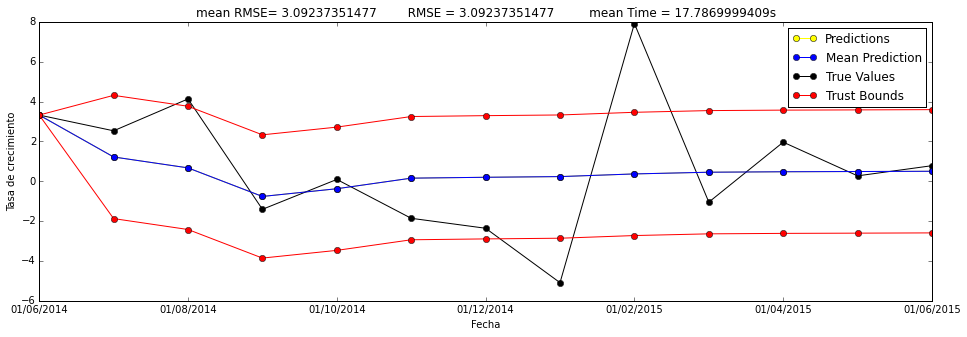

In [20]:
plot_ValSolutions(predictions[preds].as_matrix(),meanPred.as_matrix(),TS,MeanRMSE,RMSE,upperBound.as_matrix(),lowerBound.as_matrix(), meanTime)

In [447]:
predictions.groupby(['Param1'])['RMSE'].max()

Param1
100    2.921286
Name: RMSE, dtype: float64

In [448]:
predictions.groupby(['Param1'])['RMSE'].min()

Param1
100    2.77854
Name: RMSE, dtype: float64

In [449]:
predictions['Time'].mean()

15.43150007724762

In [450]:
predictions[predictions['RMSE']<10].count()

Param1    2
Param2    2
Param3    2
Param4    2
Param5    2
Pred1     2
Pred2     2
Pred3     2
Pred4     2
Pred5     2
Pred6     2
Pred7     2
Pred8     2
Pred9     2
Pred10    2
Pred11    2
Pred12    2
MSE       2
Time      2
RMSE      2
dtype: int64

In [462]:
test_predictions = pd.read_csv("Results/iteraciones/Test_predicions.csv" )

In [463]:
test_predictions[params]

,Param1,Param2,Param3,Param4,Param5
0,100,0.3,1.0,0.6,1.000000e-07
1,100,1.0,0.8,0.3,1.000000e-06


In [464]:
testmean= test_predictions[predsTest].mean()

In [465]:
test_predictions[predsTest].mean()

Pred1   -1.998577
Pred2   -1.161734
Pred3   -3.175410
Pred4   -1.016839
Pred5    2.070095
Pred6    2.633527
dtype: float64

In [466]:
test_predictions['RMSE'] = test_predictions['MSE'].apply(lambda x :  np.sqrt(x))

In [467]:
meantestRMSE = test_predictions['RMSE'].mean()
test_predictions = test_predictions[test_predictions['RMSE']<10]

In [468]:
test_predictions['RMSE']

0    4.569211
1    3.442361
Name: RMSE, dtype: float64

In [469]:
testRMSE = RMSE = np.sqrt(np.mean((TS[-12:-6].values-testmean)**2))

In [470]:
upperBound = testmean + meantestRMSE
lowerBound = testmean - meantestRMSE

In [471]:
test_predictions.count()

Param1    2
Param2    2
Param3    2
Param4    2
Param5    2
Pred1     2
Pred2     2
Pred3     2
Pred4     2
Pred5     2
Pred6     2
MSE       2
RMSE      2
dtype: int64

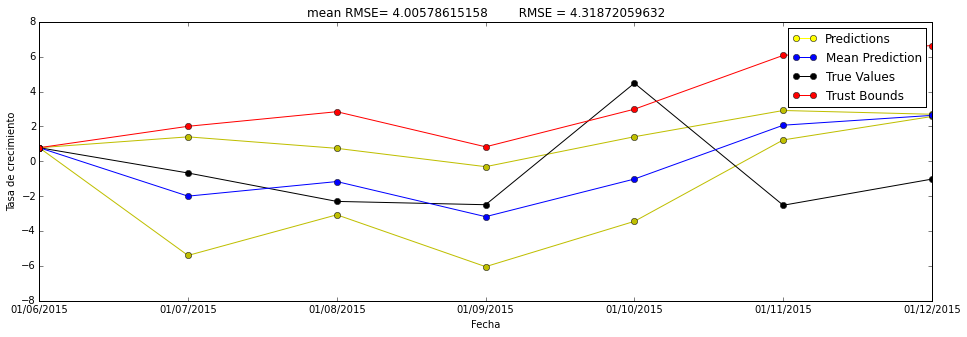

In [472]:
plot_TestSolutions(test_predictions[predsTest].as_matrix(),testmean.as_matrix(),TS,meantestRMSE,testRMSE,upperBound.as_matrix(),lowerBound.as_matrix())